In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import get_file
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise
    
print(path) 
df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:5]

C:\Users\Admin\.keras\datasets\kddcup.data_10_percent.gz
Read 494021 rows.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [104]:
ENCODING = 'utf-8'

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [105]:
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_text_dummy(df, 'land')
encode_text_dummy(df, 'logged_in')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_text_dummy(df, 'outcome')

df.dropna(inplace=True,axis=1)

df[0:5]

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,outcome-phf.,outcome-pod.,outcome-portsweep.,outcome-rootkit.,outcome-satan.,outcome-smurf.,outcome-spy.,outcome-teardrop.,outcome-warezclient.,outcome-warezmaster.
0,0,181,5450,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,239,486,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,235,1337,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,219,1337,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,217,2032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
corr_matrix = df.corr()
# print(corr_matrix['outcome'].sort_values(ascending=False))

In [86]:
df.corr().round(1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.1,...,0.0,-0.1,-0.1,0.4,0.0,-0.0,-0.0,-0.0,0.0,0.0
src_bytes,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
dst_bytes,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
land,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.1,0.0,0.0,-0.0,-0.0
wrong_fragment,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.1,-0.1,0.1,-0.0,0.0,-0.0,-0.0,0.0,-0.0
urgent,0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,0.1,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
hot,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,0.1,0.0,...,-0.0,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0
num_failed_logins,0.0,-0.0,0.0,-0.0,-0.0,0.1,0.0,1.0,-0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
logged_in,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.1,-0.0,1.0,0.0,...,-0.6,0.1,0.2,-0.1,-0.5,0.1,-0.2,-0.2,-0.1,-0.1
num_compromised,0.1,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,1.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0


In [87]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
            
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0


In [ ]:
# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

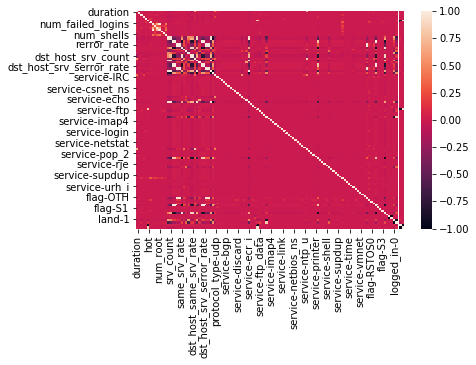

In [32]:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')
corr = df.corr()
sns.heatmap(corr)

# df.drop(['outcome'], axis=1)
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# #                 selected_columns = df.columns[columns]
# #                 df = df[selected_columns]

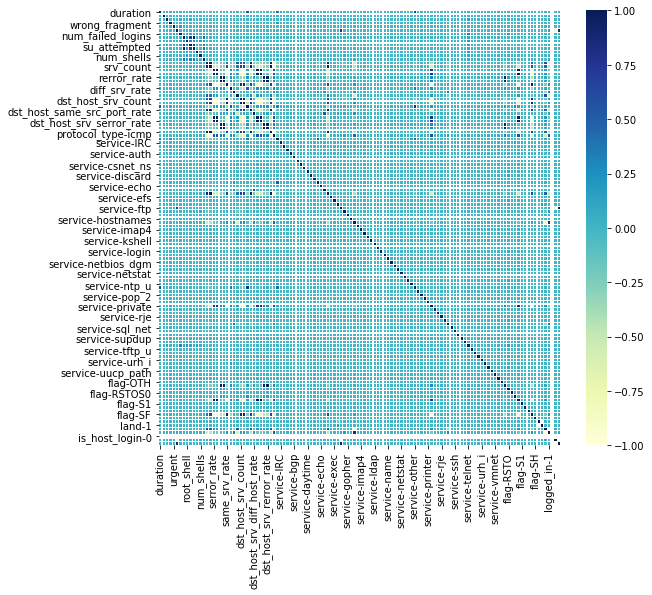

In [56]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

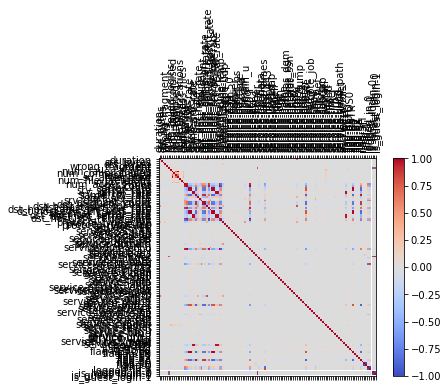

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [33]:
# https://ipython-books.github.io/74-estimating-the-correlation-between-two-variables-with-a-contingency-table-and-a-chi-squared-test/
df.corr().round(1) # (2)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
duration,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,-0.0,0.0
src_bytes,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,NaN,0.0,-0.0
dst_bytes,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,NaN,-0.0,0.0
wrong_fragment,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,0.0,-0.0
urgent,0.0,-0.0,0.0,-0.0,1.0,0.0,0.1,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,NaN,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
logged_in-0,0.0,-0.0,-0.0,0.0,-0.0,-0.1,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.2,0.0,-0.0,0.0,1.0,-1.0,NaN,0.1,-0.1
logged_in-1,-0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,0.0,...,0.0,0.2,-0.0,0.0,-0.0,-1.0,1.0,NaN,-0.1,0.1
is_host_login-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_guest_login-0,-0.0,0.0,-0.0,0.0,0.0,-0.8,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,0.1,-0.1,NaN,1.0,-1.0


In [71]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [72]:
# Drop features 
df.drop(df[to_drop], axis=1)
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [73]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.constraints import non_neg


# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', kernel_constraint=non_neg(), activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', kernel_constraint=non_neg(), activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', kernel_constraint=non_neg(), activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)
        

Train on 370515 samples, validate on 123506 samples
Epoch 1/1000
370515/370515 - 19s - loss: 0.2348 - val_loss: 0.0911
Epoch 2/1000
370515/370515 - 19s - loss: 0.0826 - val_loss: 0.0784
Epoch 3/1000
370515/370515 - 20s - loss: 0.0844 - val_loss: 0.0817
Epoch 4/1000
370515/370515 - 18s - loss: 0.0760 - val_loss: 0.0811
Epoch 5/1000
370515/370515 - 17s - loss: 0.0827 - val_loss: 0.0747
Epoch 6/1000
370515/370515 - 17s - loss: 0.0804 - val_loss: 0.0730
Epoch 7/1000
370515/370515 - 17s - loss: 0.0739 - val_loss: 0.0705
Epoch 8/1000
370515/370515 - 18s - loss: 0.0719 - val_loss: 0.0658
Epoch 9/1000
370515/370515 - 17s - loss: 0.0715 - val_loss: 0.0636
Epoch 10/1000
370515/370515 - 17s - loss: 0.0611 - val_loss: 0.0582
Epoch 11/1000
370515/370515 - 17s - loss: 0.0573 - val_loss: 0.0568
Epoch 12/1000
370515/370515 - 18s - loss: 0.0539 - val_loss: 0.0561
Epoch 13/1000
370515/370515 - 17s - loss: 0.0660 - val_loss: 0.0506
Epoch 14/1000
370515/370515 - 17s - loss: 0.0528 - val_loss: 0.0491
Epoch

In [75]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))
#non_neg, correlation > 0.95, 10, 50, 10, relu, categorical, Validation score: 0.9851748093210047
#non_neg, correlation > 0.75, 10, 50, 10, relu, categorical, Validation score: 0.9851748093210047

Validation score: 0.9856768092238434


In [ ]:
# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
def correlation(dataset, threshold):

    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    print(df)